<a href="https://colab.research.google.com/github/sakshiwarkari/PYTHON-LAB-IEEE/blob/main/deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Report on Fundamentals of Deep Learning: Basics to CNNs, RNNs, and Transformers

Deep learning is a branch of machine learning that uses multi-layered neural network architecture to identify patterns in complex data. It excels in automatic learning algorithm that uses different techniques to extract features from raw data, making capable of learning hierarchical representations. Because of these attributes, deep learning is very useful for task like pattern recognition, speech recognition, NlP etc. so basically “Deep learning is a collection of statistical techniques of machine learning for learning feature hierarchies that are actually based on artificial neural networks.”



### Bias

Bias refers to the systematic error or inaccuracies while predicting the model that arise due to the inability of model to capture the true relationship between input and output data labels. Thus, due to these oversimplified assumptions or insufficient complexity underfitting arise in the model.
Bias(Y)=E[(Y)-Y          Where Y = true value, E(Y)= expected value


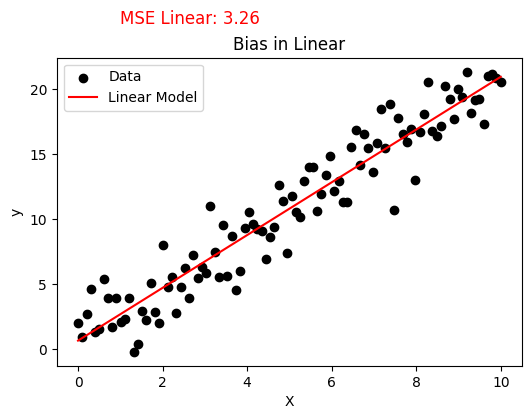

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)

# Train linear model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Plot results
plt.figure(figsize=(6, 4))

# Plot original data
plt.scatter(X, y, color='black', label='Data')

# Plot linear model predictions
plt.plot(X, y_pred_linear, color='red', label='Linear Model')

# Calculate and display mean squared error
mse_linear = mean_squared_error(y, y_pred_linear)
plt.text(1, 25, f'MSE Linear: {mse_linear:.2f}', fontsize=12, color='red')

plt.title('Bias in Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### Varience

Variance is the measure of spread in data from its mean position. It refers to the variability of the model that how much it is sensitive to another subset of the training dataset. i.e. how much it can adjust on the new subset of the training dataset. As a result due to high variance it lead to overfitting.
     Variance =E[(Y-E[Y])^2]        Where E(Y) = expected value


Train Variance: 0.09
Test Variance: 0.82


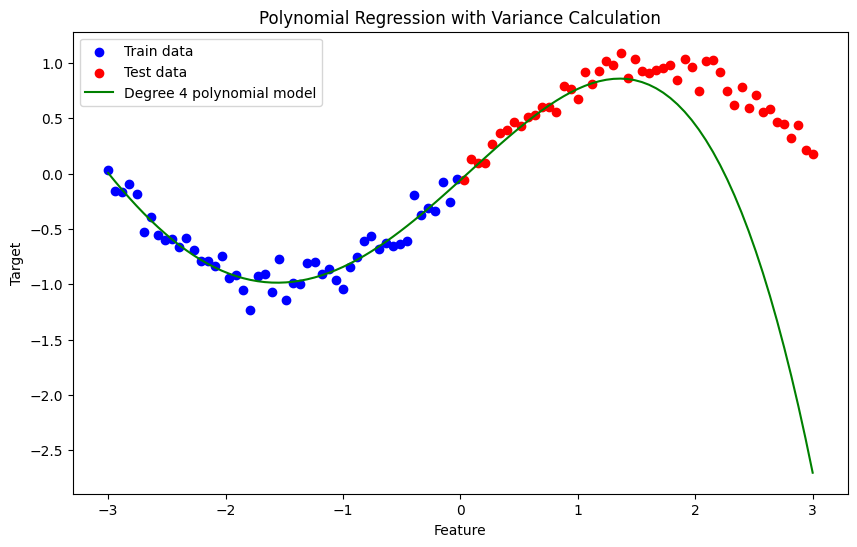

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # True relationship + noise

# Split the data into training and test sets
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

# Transform the data to include polynomial features
degree = 4
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on training set
y_pred_train = model.predict(X_poly_train)
y_pred_train_torch = torch.tensor(y_pred_train, dtype=torch.float32)

# Predict on test set
y_pred_test = model.predict(X_poly_test)
y_pred_test_torch = torch.tensor(y_pred_test, dtype=torch.float32)

# Calculate variance of the predictions
variance_train = torch.var(y_pred_train_torch, unbiased=False)
variance_test = torch.var(y_pred_test_torch, unbiased=False)

print(f'Train Variance: {variance_train.item():.2f}')
print(f'Test Variance: {variance_test.item():.2f}')

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='red', label='Test data')

# Plot the polynomial regression line
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
plt.plot(X_plot, model.predict(X_plot_poly), color='green', label=f'Degree {degree} polynomial model')

plt.title('Polynomial Regression with Variance Calculation')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


#### Regularization

Regularization is techniques which is use to prevent overfitting, which occurs when a model learns to perform very well on the training data but fails on unseen data.

This technique helps to maintain all variables or features in the model by reducing the magnitude of the variables. Hence, it maintains accuracy as well as a generalize the model.

Common regularization is techniques
1.	Ridge regularization -
Type of regularization in which a small amount of bias is introduced to get better long-term predictions. The amount of bias added to the model is called Ridge Regression penalty. It helps to reduce the complexity of model so also called as L2 regularization.

   Loss=Original Loss+λ∑wi^2    
   
      λ is a hyperparameter that controls the regularization






In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()

# Define the optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  # weight_decay parameter adds L2 regularization

# Example input and target tensors
inputs = torch.randn(64, 10)  # Batch of 64, 10 features each
targets = torch.randn(64, 1)  # Batch of 64, 1 target each

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 1.417108416557312
Epoch 10, Loss: 1.1141513586044312
Epoch 20, Loss: 1.0093706846237183
Epoch 30, Loss: 0.9430888295173645
Epoch 40, Loss: 0.8911533951759338
Epoch 50, Loss: 0.8485190868377686
Epoch 60, Loss: 0.8127501606941223
Epoch 70, Loss: 0.7824785113334656
Epoch 80, Loss: 0.7567921876907349
Epoch 90, Loss: 0.7348084449768066


2.	Lasso Regularization-
Type of regularization technique which uses the L1 regularization so it is  called as LASSO(Least Absolute Shrinkage and Selection Operator) that helps to reduce the complexity ,overfitting and feature selection.
in the model.
        
        Loss=Original Loss+λ∑∣wi∣

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define the L1 regularization strength
l1_lambda = 0.01

# Example input and target tensors
inputs = torch.randn(64, 10)  # Batch of 64, 10 features each
targets = torch.randn(64, 1)  # Batch of 64, 1 target each

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Add L1 regularization
    l1_norm = sum(param.abs().sum() for param in model.parameters())
    loss = loss + l1_lambda * l1_norm

    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')



Epoch 0, Loss: 1.8858609199523926
Epoch 10, Loss: 1.7876691818237305
Epoch 20, Loss: 1.7534050941467285
Epoch 30, Loss: 1.7303922176361084
Epoch 40, Loss: 1.7106082439422607
Epoch 50, Loss: 1.6929242610931396
Epoch 60, Loss: 1.677022099494934
Epoch 70, Loss: 1.661887526512146
Epoch 80, Loss: 1.6473872661590576
Epoch 90, Loss: 1.6333261728286743


####MLP (Multi-Layer Perceptron)

Multi-Layer perceptron defines the most complex architecture of artificial neural networks that consist of multiple layer of neurons, each connected to next layer. MLPs are a fundamental type of feedforward neural network, where information flows in one direction from input nodes through intermediate hidden layers to output nodes.

####Structure of MLP


*   Input Layer: The first layer of the MLP receives the input data. Each input feature typically corresponds to one neuron in this layer.
*   Hidden Layers: Between the input and output layers, MLPs can have one or more layers of neurons called hidden layers. Each neuron in a hidden layer is fully connected to all neurons in the previous and next layers.
* Output Layers:The number of neurons in the output layer depends on the task. For binary classification, there is typically one neuron. For multi-class classification, there is one neuron per class.

Working of MultiLayer Perceptron Neural Network

* The input node represents the feature of the dataset.  
* Each input node passes the vector input value to the hidden layer.
* In the hidden layer, each edge has some weight multiplied by the input variable. All the production values from the hidden nodes are summed together. To generate the output
* The activation function is used in the hidden layer to identify the active nodes.
* The output is passed to the output layer.
* Calculate the difference between predicted and actual output at the output layer.
* The model uses backpropagation after calculating the predicted output.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(2, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    test_outputs = model(X_test_tensor)

    _, train_predicted = torch.max(train_outputs, 1)
    _, test_predicted = torch.max(test_outputs, 1)

    train_accuracy = accuracy_score(y_train_tensor.numpy(), train_predicted.numpy())
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predicted.numpy())

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Epoch [100/1000], Loss: 0.5247
Epoch [200/1000], Loss: 0.3428
Epoch [300/1000], Loss: 0.3051
Epoch [400/1000], Loss: 0.2885
Epoch [500/1000], Loss: 0.2697
Epoch [600/1000], Loss: 0.2507
Epoch [700/1000], Loss: 0.2341
Epoch [800/1000], Loss: 0.2234
Epoch [900/1000], Loss: 0.2169
Epoch [1000/1000], Loss: 0.2129
Training Accuracy: 0.92
Test Accuracy: 0.92


#### Deep neural network (DNN)

DNN is type of ANN that contain multiple hidden layers between the input and output layer. It can model complex non-linear relationship.
The main purpose of it is to receive a set of inputs that perform complex calculations on them, and give output to solve real world problems like classification.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Setup and Load Data
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# 2. Define the DNN Model
class SimpleDNN(nn.Module):
    def __init__(self):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(256, 128)    # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(128, 10)     # Second hidden layer to output layer
        self.relu = nn.ReLU()             # ReLU activation function
        self.softmax = nn.LogSoftmax(dim=1) # LogSoftmax activation for the output layer

    def forward(self, x):
        x = x.view(-1, 28*28)    # Flatten the input image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Instantiate the model, define the loss function and the optimizer
model = SimpleDNN()
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training the Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")

# 4. Evaluating the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%")


Epoch [1/5], Loss: 0.3420
Epoch [2/5], Loss: 0.1558
Epoch [3/5], Loss: 0.1144
Epoch [4/5], Loss: 0.0916
Epoch [5/5], Loss: 0.0756
Accuracy of the model on the 10,000 test images: 96.92%


####What is an Activation Function?

An activation function in neural network is a mathematical formula that tell us whether a neuron should be activated or not by calculating weighted sum and further adding bias to it .this process of updating the weight and biases of neurons on basis of error is called as back propagation. The basic purpose of it is for introducing non- introduce non-linearity into the output of a neuron.

#### Back propagation

Back propagation is an effective algorithm that helps to minimize the cost function and it can be implemented by using the mathematical rule called chain rule from calculus to navigate through complex layers of the neural network.



#### Why do we need Non-linear activation function?

Without activation function each neuron would just be doing a simple calculation that doesn't allow the network to understand complex patterns in the data in real world like image recognition, natural language processing, and more. Thus to understand the complexity, Flexibility in Learning, and Avoiding Problems we need activation function.


#### Types of Activation Functions-
1. Sigmoid Function

  Formula: σ(x)=1/1+e^-x

  Range: Outputs range between 0 and 1.

  Usage: Historically used in binary classification tasks.


2. Hyperbolic Tangent (tanh) Activation Function

 Formula: Tanh(x)=e^x-e^-x/e^x+e^-x

 Range: Outputs range between -1 and 1.

 Usage: Often used in hidden layers of neural networks.


3. Rectified Linear Unit (ReLU) Activation Function

 Formula: ReLU(x)=max(0,x)

 Range: Outputs 0 for negative inputs and linearly scales positive inputs.

 Usage: Most commonly used activation function in hidden layers due to its simplicity and effectiveness.

4. Leaky ReLU Activation Function

  Formula: Leaky ReLU(x)={ x    if x>=0
  ax if x< 0

 Range: Outputs a small non-zero gradient for negative inputs.

 Usage: Addresses the "dying ReLU" problem where neurons may become inactive for negative inputs.

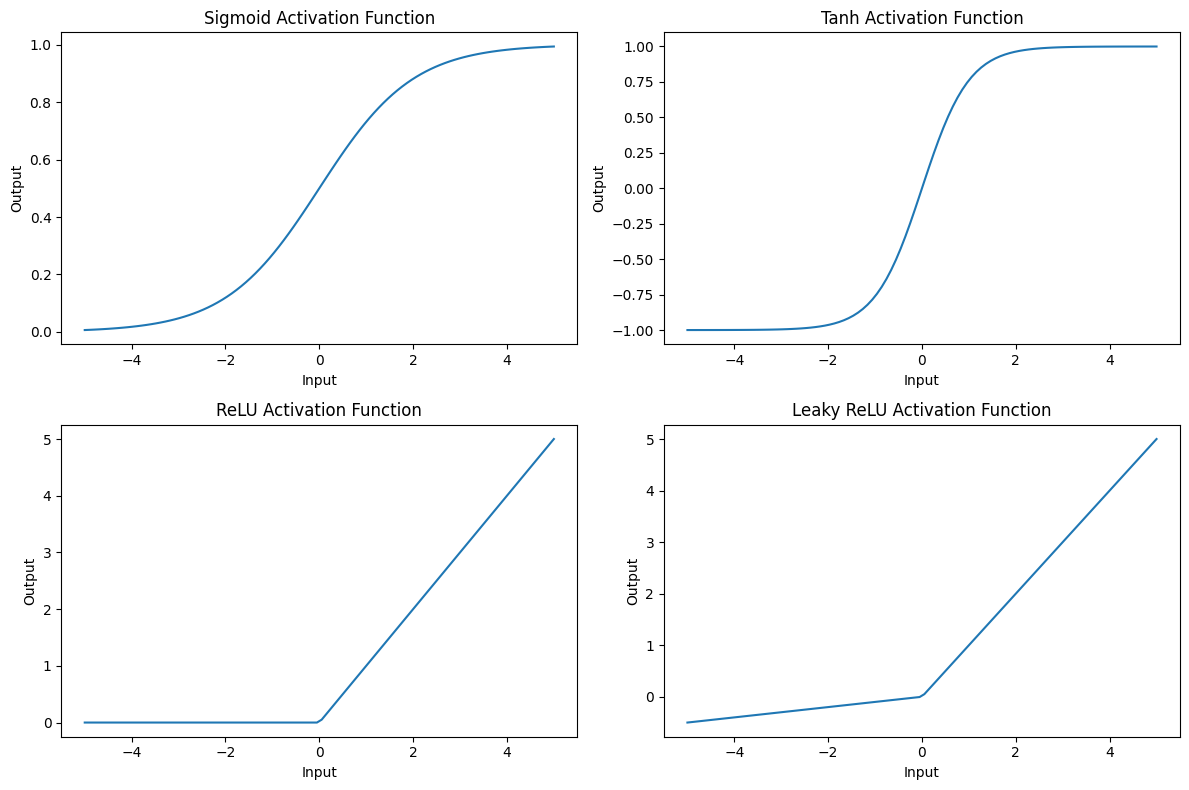

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Define the input range
x = torch.linspace(-5, 5, 100)

# Sigmoid activation function
sigmoid = torch.sigmoid(x).numpy()

# Tanh activation function
tanh = torch.tanh(x).numpy()

# ReLU activation function
relu = F.relu(x).numpy()

# Leaky ReLU activation function (with negative slope of 0.1)
leaky_relu = F.leaky_relu(x, negative_slope=0.1).numpy()

# Plotting the activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Sigmoid Activation Function')
plt.plot(x.numpy(), sigmoid)
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 2, 2)
plt.title('Tanh Activation Function')
plt.plot(x.numpy(), tanh)
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 2, 3)
plt.title('ReLU Activation Function')
plt.plot(x.numpy(), relu)
plt.xlabel('Input')
plt.ylabel('Output')

plt.subplot(2, 2, 4)
plt.title('Leaky ReLU Activation Function')
plt.plot(x.numpy(), leaky_relu)
plt.xlabel('Input')
plt.ylabel('Output')

plt.tight_layout()
plt.show()

#### Loss Function
A loss function, also known as a cost function or objective function. It is a mathematical function that measures the difference between the predicted output of a neural network and the actual target values. It quantifies how well or poorly the model is performing, guiding the learning process by providing feedback that the network uses to adjust its weights.


#### CNN
CNN is a type of deep learning algorithm that helps in image classification and image recognition in neural networks. The architecture of CNNs is inspired by the visual processing in the human brain, and they are well-suited for capturing hierarchical patterns and spatial dependencies within images.

components of a CNN
1.	Convolutional Layers: This layers uses different convolutional operations to understand input images by using filters (also known as kernels) to detect features such as edges, textures, and more complex patterns.
2.	Pooling Layers: Pooling layer performs downsampling operations to reduce the spatial dimensions of the feature maps. Max pooling is a common pooling operation for selecting the maximum value from a group of neighboring pixels.
3.	Activation Functions: It introduces non-linear activation functions learn complex patterns in data.
4.	Fully Connected Layers: They are responsible for making predictions based on the high-level features learned by the previous layers. They connect every neuron in one layer to every neuron in the next layer.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define transforms for the training data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 7010842.34it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1119657.03it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9541134.57it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8275642.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 0.2041920288267341
Epoch 2, Loss: 0.05832803713555918
Epoch 3, Loss: 0.04118410168043864
Epoch 4, Loss: 0.030673390339207608
Epoch 5, Loss: 0.022766374649999015
Accuracy: 99.01%


#### Recurrent Neural Network (RNN)

Recurrent neural network (RNN) is a type of artificial neural network use for speech recognition and natural language processing to recognize patterns, text, handwriting, the spoken word, and numerical time series data. In RNN the all the inputs and outputs are independent of each other and output from previous step is fed as input to the current step.

The main and most important feature of RNN is its Hidden state. It acts as a memory that captures information from previous time steps. In each step, the hidden state is updated based on the current input and the previous hidden state.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple RNN
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Example input and target tensors
# Batch size = 3, Sequence length = 5, Input size = 1
inputs = torch.tensor([[[1.0], [2.0], [3.0], [4.0], [5.0]],
                       [[2.0], [3.0], [4.0], [5.0], [6.0]],
                       [[3.0], [4.0], [5.0], [6.0], [7.0]]])

targets = torch.tensor([[6.0], [7.0], [8.0]])

# Initialize the model, loss function, and optimizer
model = SimpleRNN(input_size=1, hidden_size=10, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Testing the model
model.eval()
with torch.no_grad():
    test_input = torch.tensor([[[4.0], [5.0], [6.0], [7.0], [8.0]]])
    test_output = model(test_input)
    print(f'Predicted output: {test_output.item()}')


Epoch 10, Loss: 35.88801193237305
Epoch 20, Loss: 23.00251007080078
Epoch 30, Loss: 13.237116813659668
Epoch 40, Loss: 7.054907321929932
Epoch 50, Loss: 3.4708595275878906
Epoch 60, Loss: 1.68621826171875
Epoch 70, Loss: 0.9512674808502197
Epoch 80, Loss: 0.7152008414268494
Epoch 90, Loss: 0.6640000939369202
Epoch 100, Loss: 0.6603707075119019
Predicted output: 7.02909517288208


####Feedforward Neural Network (FNN)
A Feedforward Neural Network (FNN) is a type of artificial neural network where connections between the nodes do not form cycles. This characteristic differentiates it from recurrent neural networks (RNNs). The network consists of an input layer, one or more hidden layers, and an output layer. Information flows in one direction—from input to output—hence the name “feedforward.”


####Transformer
Before transformer RNN architecture was used to tackle almost all NLP problems but due to the certain drawbacks of it like RNN networks do not operate well in long words, and training time is too sluggish since the model must walk through sentences step by step. So therefore Transformers were created to address such issues. Transformer architecture may be thought of as an architecture in which the attention mechanism is applied to the whole encoder and decoder.


In [ ]:
import torch
import torch.nn as nn

# Simplified Multi-Head Attention
class SimpleMultiHeadAttention(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleMultiHeadAttention, self).__init__()
        self.attention = nn.MultiheadAttention(d_model, nhead)

    def forward(self, query, key, value):
        query, key, value = query.permute(1, 0, 2), key.permute(1, 0, 2), value.permute(1, 0, 2)
        attn_output, _ = self.attention(query, key, value)
        return attn_output.permute(1, 0, 2)

# Simplified Transformer Encoder Layer
class SimpleTransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleTransformerEncoderLayer, self).__init__()
        self.self_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.layer_norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Self-Attention
        attn_output = self.self_attention(x, x, x)
        x = self.layer_norm1(x + self.dropout(attn_output))
        # Feed Forward
        ff_output = self.feed_forward(x)
        x = self.layer_norm2(x + self.dropout(ff_output))
        return x

# Simplified Transformer Decoder Layer
class SimpleTransformerDecoderLayer(nn.Module):
    def __init__(self, d_model, nhead):
        super(SimpleTransformerDecoderLayer, self).__init__()
        self.self_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.encoder_attention = SimpleMultiHeadAttention(d_model, nhead)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )
        self.layer_norm1 = nn.LayerNorm(d_model)
        self.layer_norm2 = nn.LayerNorm(d_model)
        self.layer_norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(0.1)

    def forward(self, tgt, memory):
        # Self-Attention
        self_attn_output = self.self_attention(tgt, tgt, tgt)
        tgt = self.layer_norm1(tgt + self.dropout(self_attn_output))
        # Encoder-Decoder Attention
        enc_dec_attn_output = self.encoder_attention(tgt, memory, memory)
        tgt = self.layer_norm2(tgt + self.dropout(enc_dec_attn_output))
        # Feed Forward
        ff_output = self.feed_forward(tgt)
        tgt = self.layer_norm3(tgt + self.dropout(ff_output))
        return tgt

# Complete Simplified Transformer Model
class SimpleTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_encoder_layers, num_decoder_layers):
        super(SimpleTransformer, self).__init__()
        self.encoder_layers = nn.ModuleList([
            SimpleTransformerEncoderLayer(d_model, nhead) for _ in range(num_encoder_layers)
        ])
        self.decoder_layers = nn.ModuleList([
            SimpleTransformerDecoderLayer(d_model, nhead) for _ in range(num_decoder_layers)
        ])
        self.fc_out = nn.Linear(d_model, 1)  # Output layer (e.g., for regression tasks)

    def forward(self, src, tgt):
        memory = src
        for layer in self.encoder_layers:
            memory = layer(memory)
        output = tgt
        for layer in self.decoder_layers:
            output = layer(output, memory)
        output = self.fc_out(output)
        return output

# Example usage
if __name__ == "__main__":
    d_model = 64
    nhead = 4
    num_encoder_layers = 2
    num_decoder_layers = 2

    model = SimpleTransformer(d_model, nhead, num_encoder_layers, num_decoder_layers)

    # Dummy input (sequence length=10, batch size=32, feature size=64)
    src = torch.randn(32, 10, d_model)  # Source sequence
    tgt = torch.randn(32, 10, d_model)  # Target sequence
    output = model(src, tgt)
    print(output.shape)

torch.Size([32, 10, 1])
